In [2]:
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
boston = load_boston()

In [3]:
## boston.data contains the input data and boston.target contains the price of houses.

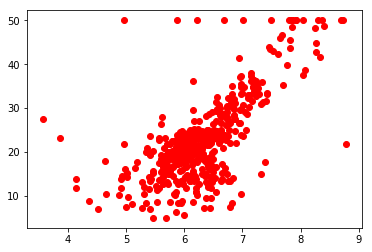

In [4]:
plt.scatter(boston.data[:,5], boston.target, color='r')
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np
lr = LinearRegression()
x = boston.data[:,5]
#print(x)
y = boston.target
x = np.transpose(np.atleast_2d(x))
#print(x, y)
lr.fit(x, y)
y_predicted = lr.predict(x)

In [6]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_predicted)
print("Mean squared error (of training data): {:.3}".format(mse))

rmse = np.sqrt(mse)
print("RMSE (of training data): {:.3}".format(rmse))

Mean squared error (of training data): 43.6
RMSE (of training data): 6.6


In [7]:
## coefficient of determination = 1 - [sum(y[i] - y_pred[i])]/[sum(y[i] - mean(y))] = 1 - MSE/VAR(y)

In [8]:
from sklearn.metrics import r2_score
r2 = r2_score(y, lr.predict(x))
print("R2 (on training data): {:.2}".format(r2)) # This measure is also called the R² score.

R2 (on training data): 0.48


In [9]:
# compute the coefficient of determination is to use the score
# method of the LinearRegression object:
r3 = lr.score(x,y)
print(r3)

0.483525455991


### Multidimensional regression

In [10]:
# try to predict a single output (the average house price) based on multiple inputs.

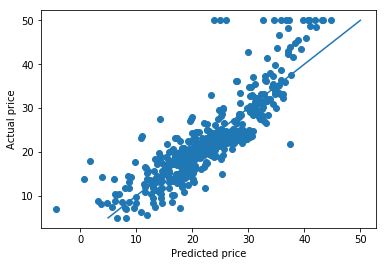

In [11]:
x = boston.data
y = boston.target
lr.fit(x, y)
p = lr.predict(x)
plt.scatter(p, y)
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.plot([y.min(), y.max()], [[y.min()], [y.max()]])
plt.show()

### Cross-validation for regression

In [12]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
p = np.zeros_like(y)
for train_index, test_index in kf.split(x):
    #print(train_index, test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lr.fit(X_train, y_train)
    p[test_index] = lr.predict(X_test)
rmse_cv = np.sqrt(mean_squared_error(p, y))
print('RMSE on 5-fold CV: {:.2}'.format(rmse_cv))

RMSE on 5-fold CV: 6.1


### Penalized or regularized regression

In [13]:
# In ordinary regression, the returned fit is the best fit on the training data. This can lead to over-fitting.
# Penalizing means that we add a penalty for over-confidence in the parameter values.
# Thus, we accept a slightly worse fit in order to have a simpler model.

In [14]:
# The L1 penalized model is often called the Lasso, while an L2 penalized
# one is known as Ridge Regression. When using both, we call this an ElasticNet model.

In [19]:
# Using Lasso or ElasticNet in scikit-learn
from sklearn.linear_model import ElasticNet, Lasso
en = ElasticNet(alpha=0.5)

for train_index, test_index in kf.split(x):
    #print(train_index, test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    en.fit(X_train, y_train)
    p[test_index] = en.predict(X_test)
rmse_cv = np.sqrt(mean_squared_error(p, y))
print('RMSE on 5-fold CV: {:.2}'.format(rmse_cv))

x = boston.data[:,5]
y = boston.target
x = np.transpose(np.atleast_2d(x))
#print(x, y)
en.fit(x, y)
y_predicted = en.predict(x)

mse = mean_squared_error(y, y_predicted)
print("Mean squared error (of training data): {:.3}".format(mse))

rmse = np.sqrt(mse)
print("RMSE (of training data): {:.3}".format(rmse))

RMSE on 5-fold CV: 7.8
Mean squared error (of training data): 49.3
RMSE (of training data): 7.02


In [23]:
# Visualizing the Lasso path
las = Lasso(normalize=1)
alphas = np.logspace(-5, 2, 1000)
alphas, coefs, _= las.path(x, y, alphas=alphas)
fig,ax = plt.subplots()
ax.plot(alphas, coefs.T)
# Set log scale
ax.set_xscale('log')
# Make alpha decrease from left to right
ax.set_xlim(alphas.max(), alphas.min())
#plt.show()

(100.0, 1.0000000000000001e-05)

### P-greater-than-N scenarios

In [24]:
# the number of features, P, was greater than the number of examples, N (these letters were the
# conventional statistical shorthand for these concepts). These became known as P greater than N problems.

### An example based on text documents

In [26]:
from sklearn.datasets import load_svmlight_file


In [27]:
data,target = load_svmlight_file('E2006.train')

FileNotFoundError: [Errno 2] No such file or directory: 'E2006.train'